In [1]:
# coding: utf-8
%matplotlib notebook
%load_ext autoreload
%autoreload 2

#from matplotlib import pyplot as plt
#import pandas as pd
#import numpy as np
#from torch import nn
#from torch.nn import Linear, MSELoss, CrossEntropyLoss, HingeEmbeddingLoss, Tanh, Softmax, Sigmoid#, ReLU
#from torch.optim import SGD, Adam, Adadelta, Adamax

from circlesV2 import *
from tme5 import CirclesData

<IPython.core.display.Javascript object>


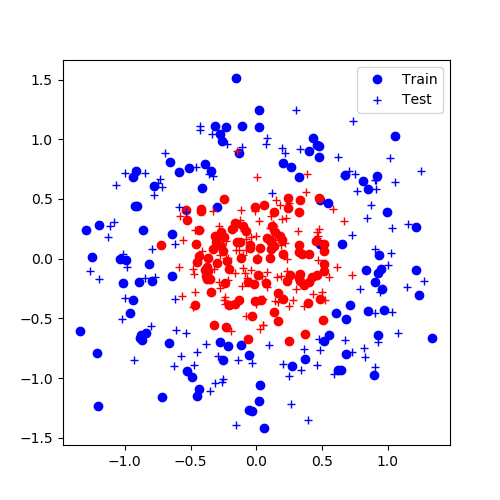

torch.Size([200, 2])


In [2]:
data = CirclesData()
data.plot_data()
Xtrain = data.Xtrain
print(Xtrain.shape)
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]                                   

In [3]:
params = init_params(nx, nh, ny)
eta = 0.005
#print( params['Wy'].grad.zero())

In [ ]:
'''for i in range(100):
    
    Yhat, outs = forward(params, Xtrain)
    #print(torch.max(Yhat,1)[1])
    #L, acc = loss_accuracy(Yhat, data.Ytrain)
    L, acc = loss_accuracy(Yhat, data.Ytrain)
    print(acc)
    L.backward()
    params = sgd(params, eta)
    #params = sgd(params, eta)
    #print(params)'''

In [ ]:
epochs = 100
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
for epoch in range(epochs):
    print(epoch)
    for j in range(int(N/Nbatch)):
        Xbatch = data.Xtrain[Nbatch*j:Nbatch*(j+1), :]
        Ybatch = data.Ytrain[Nbatch*j:Nbatch*(j+1), :]
        Yhat, outs = forward(params, Xbatch)
        L, _ = loss_accuracy(Yhat, Ybatch)
        L.backward()
        #grads = backward(params, outputs=outs, Y=Ybatch)
        params = sgd(params, eta)
    Yhat, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    L, acc = loss_accuracy(Yhat, data.Ytrain)
    L_test, acc_test = loss_accuracy(Yhat_test, data.Ytest)
    train_accuracies.append(acc)
    train_losses.append(L)
    test_accuracies.append(acc_test)
    test_losses.append(L_test)

plt.figure()
plt.plot(range(epochs), train_accuracies, test_accuracies)
plt.legend(["train", "test"])
plt.figure()
plt.plot(range(epochs), train_losses, test_losses)
plt.legend(["train", "test"])
# attendre un appui sur une touche pour garder les figures
input("done")

0


/home/jeff/anaconda3/lib/python3.7/site-packages/torch/tensor.py:263: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>